<a href="https://colab.research.google.com/github/ankitlamba1408/Projects/blob/main/Intership_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Learning representation of movies through multimodal networks***

Author: Ankit LAMBA



     



Mounting the google drive to get the datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extracting the movielens data

In [ ]:
!unzip -o "/content/drive/MyDrive/ml-20m.zip"

Archive:  /content/drive/MyDrive/ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the MMTF14K dataset files

In [ ]:
#Loading in the movies dataset
movies_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Data/movie_description.csv',sep=',', engine='python')
movies_df = movies_df.sort_values("movieId", ascending=True)
movies_df

,movieId,title,YTId
0,89,Nick of Time (1995),PaLHJCnAXi4
1,93,Vampire in Brooklyn (1995),dNwt2Demll8
2,94,Beautiful Girls (1996),yfQ5ONwWxI8
3,95,Broken Arrow (1996),De29KipeZQw
4,96,In the Bleak Midwinter (1995),vBS92ui_h74
...,...,...,...
13618,131237,What Men Talk About (2010),WZuc-Jkb6z4
13619,131239,Three Quarter Moon (2011),mjOJu_erZzg
13620,131248,Brother Bear 2 (2006),_9SV0q1A1_4
13621,131258,The Pirates (2014),1zFBtd_WEks


In [ ]:
movies_df.describe()

,movieId
count,13623.000000
mean,60973.805329
std,46634.419179
min,89.000000
25%,5154.500000
50%,78974.000000
75%,102994.000000
max,131262.000000


In [ ]:
len(movies_df)

13623

Exploratory data analysis on MMTF14K and movielens datasets

In [ ]:
movies_genre_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Metadata/GenreFeatures.csv',sep=',', engine='python')
movies_genre_df = movies_genre_df.sort_values("movieId", ascending=True)
movies_genre_df

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,89,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,93,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,94,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,95,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,96,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13618,131237,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
13619,131239,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
13620,131248,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
13621,131258,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text major ticklabel objects>)

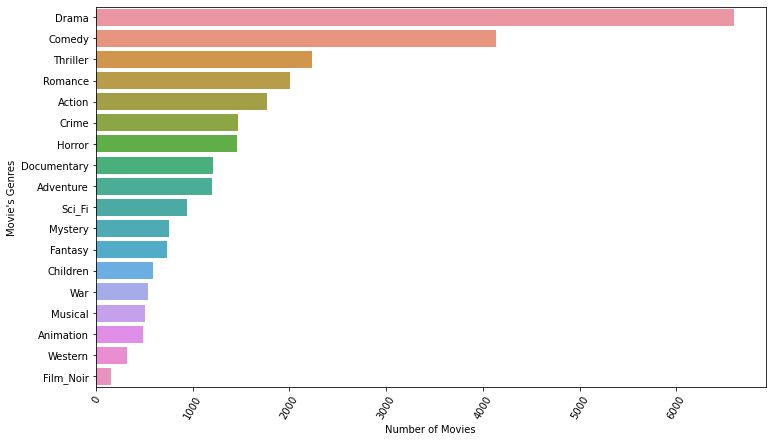

In [ ]:
genres = ['Action',	'Adventure',	'Animation',	'Children',	'Comedy',	'Crime',	'Documentary',	'Drama',	'Fantasy',	'Film_Noir',	'Horror',	'Musical',	'Mystery',	'Romance',	'Sci_Fi',	'Thriller',	'War',	'Western'] 
plt.figure(figsize=(12,7))
genere_counts = movies_genre_df.loc[:,genres].sum().sort_values(ascending=False)
sns.barplot(x=genere_counts.values, y= genere_counts.index)
plt.ylabel("Movie's Genres")
plt.xlabel("Number of Movies")
plt.xticks(rotation=60)

In [ ]:
movies_year_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Metadata/YearOfProd.csv',sep=',', engine='python')
movies_year_df = movies_year_df.sort_values("movieId", ascending=True)
movies_year_df

,movieId,Year
0,89,1995
1,93,1995
2,94,1996
3,95,1996
4,96,1995
...,...,...
13618,131237,2010
13619,131239,2011
13620,131248,2006
13621,131258,2014


<function matplotlib.pyplot.show>

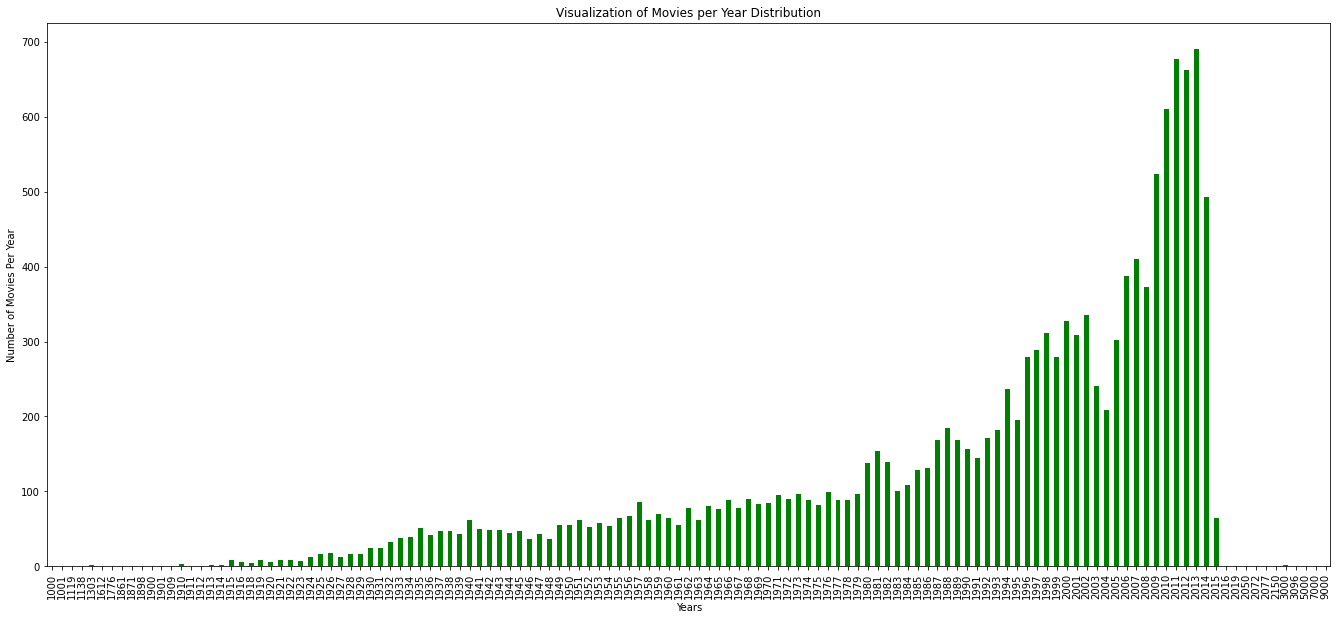

In [ ]:
movies_year_df.groupby('Year')['movieId'].count().plot(kind = 'bar',color = 'green',figsize = (23, 10))
plt.xlabel('Years')
plt.ylabel('Number of Movies Per Year')
plt.title('Visualization of Movies per Year Distribution')
plt.show

<function matplotlib.pyplot.show>

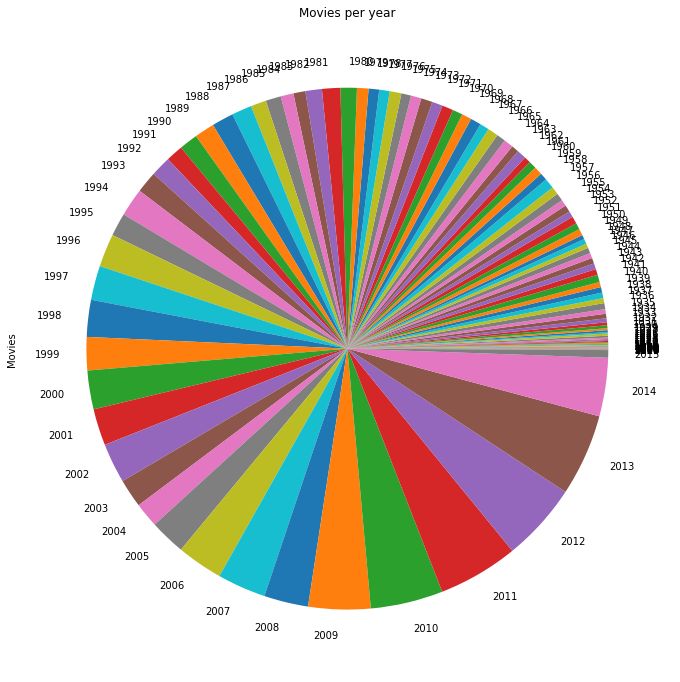

In [ ]:
movies_year_df.groupby('Year')['movieId'].count().plot(kind = 'pie',figsize = (12, 12))
plt.ylabel("Movies")
plt.title('Movies per year')
plt.show

In [ ]:
tag_features_df = pd.read_csv('/content/ml-20m/tags.csv',sep=',', engine='python')
tag_features_df = tag_features_df.sort_values("movieId", ascending=True)
tag_features_df

,userId,movieId,tag,timestamp
358938,110148,1,friendship,1422605756
42994,10616,1,animation,1277357417
42993,10616,1,animated,1277357419
42992,10616,1,adventure,1277357423
134542,35984,1,animation,1152405430
...,...,...,...,...
120022,28906,131258,Korea,1427745512
120021,28906,131258,bandits,1427745421
120025,28906,131258,whale,1427745432
120024,28906,131258,pirates,1427745419


In [ ]:
movies_tags_merge_Frame = pd.merge(movies_df, tag_features_df, on='movieId')
movies_tags_merge_Frame  = movies_tags_merge_Frame.sort_values('movieId', ascending=True)
movies_tags_merge_Frame

,movieId,title,YTId,userId,tag,timestamp
0,89,Nick of Time (1995),PaLHJCnAXi4,130827,hostage,1309883739
19,89,Nick of Time (1995),PaLHJCnAXi4,127138,maybe,1342631802
18,89,Nick of Time (1995),PaLHJCnAXi4,103668,Johnny Depp,1151968076
17,89,Nick of Time (1995),PaLHJCnAXi4,130827,kidnapping,1309883623
16,89,Nick of Time (1995),PaLHJCnAXi4,130827,on dvr,1309194254
...,...,...,...,...,...,...
249062,131258,The Pirates (2014),1zFBtd_WEks,28906,whale,1427745432
249063,131258,The Pirates (2014),1zFBtd_WEks,28906,pirates,1427745419
249060,131258,The Pirates (2014),1zFBtd_WEks,28906,Korea,1427745512
249061,131258,The Pirates (2014),1zFBtd_WEks,28906,bandits,1427745421


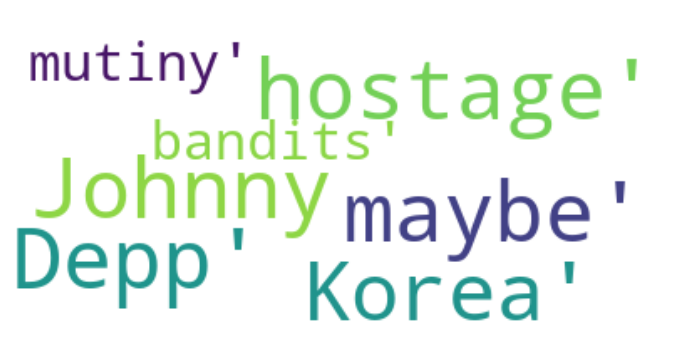

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = movies_tags_merge_Frame['tag'].values 

wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white").generate(str(text))

plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Gettings the ratings from MovieLens datasets

In [ ]:
#Loading in the ratings dataset
ratings_df = pd.read_csv('/content/ml-20m/ratings.csv', sep=',', engine='python')
ratings_df = ratings_df.sort_values("movieId", ascending=True)

In [ ]:
ratings_df

,userId,movieId,rating,timestamp
14162882,97809,1,3.0,1213159631
15347420,106140,1,5.0,1359430429
15347355,106138,1,3.0,1028130533
10170195,70354,1,4.5,1297623340
10170255,70355,1,3.5,1201366614
...,...,...,...,...
11528488,79570,131254,4.0,1427743979
11528489,79570,131256,4.0,1427744888
4243883,28906,131258,2.5,1427745392
9459645,65409,131260,3.0,1427745466


In [ ]:
ratings_df.describe()

Mergings the ratings obtained from MovieLens to the movie in MMTF14k using movieIds to get the mean ratings corresponding to each movie in MMTF14k dataset

In [ ]:
movies_ratings_merge_Frame = pd.merge(movies_df, ratings_df, on='movieId')
movies_ratings_merge_Frame  = movies_ratings_merge_Frame.sort_values('movieId', ascending=True)
movies_ratings_merge_Frame

,movieId,title,YTId,userId,rating,timestamp
0,89,Nick of Time (1995),PaLHJCnAXi4,26848,3.0,860510874
2160,89,Nick of Time (1995),PaLHJCnAXi4,106069,4.0,849373747
2161,89,Nick of Time (1995),PaLHJCnAXi4,48540,1.0,956941907
2162,89,Nick of Time (1995),PaLHJCnAXi4,120458,2.0,976158620
2163,89,Nick of Time (1995),PaLHJCnAXi4,91020,2.5,1059413907
...,...,...,...,...,...,...
12471734,131237,What Men Talk About (2010),WZuc-Jkb6z4,134701,3.0,1427735690
12471735,131239,Three Quarter Moon (2011),mjOJu_erZzg,79570,4.0,1427738589
12471736,131248,Brother Bear 2 (2006),_9SV0q1A1_4,79570,4.0,1427742288
12471737,131258,The Pirates (2014),1zFBtd_WEks,28906,2.5,1427745392


In [ ]:
mean_rating_df = movies_ratings_merge_Frame.groupby('movieId', as_index=False)['rating'].mean()
mean_rating_df

,movieId,rating
0,89,3.139821
1,93,2.528739
2,94,3.526923
3,95,3.094644
4,96,3.687371
...,...,...
13618,131237,3.000000
13619,131239,4.000000
13620,131248,4.000000
13621,131258,2.500000


Text(0.5, 1.0, ' Visualization of number of movies per rating')

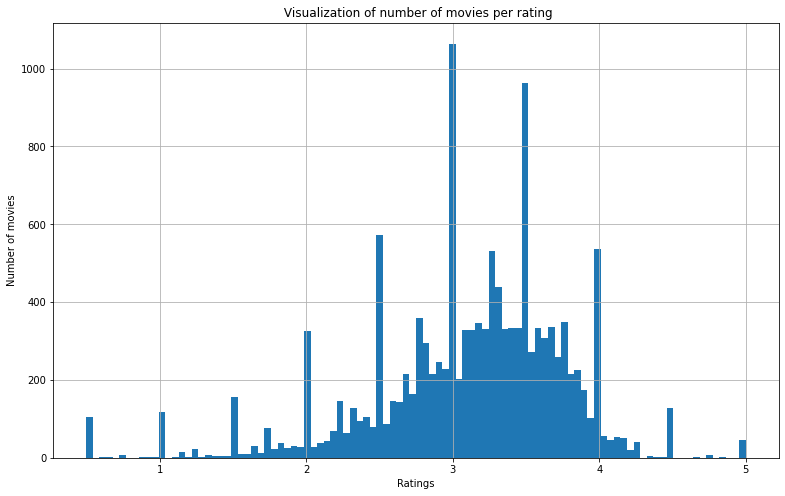

In [ ]:
mean_rating_df["rating"].hist(figsize = (13, 8),bins=100)
plt.ylabel("Number of movies")
plt.xlabel("Ratings")
plt.title(" Visualization of number of movies per rating")


Getting the multimodal audio and visual features from MMTF14k dataset

Audio Features

In [ ]:
#Audio_BLF_CORRELATIONfeat_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Audio/Block level features/Component6/BLF_CORRELATIONfeat.csv', sep=',', engine='python')
#Audio_BLF_CORRELATIONfeat_df = Audio_BLF_CORRELATIONfeat_df.sort_values("movieId")

In [ ]:
#Audio_BLF_DELTASPECTRALfeat_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Audio/Block level features/Component6/BLF_DELTASPECTRALfeat.csv', sep=',', engine='python')
#Audio_BLF_DELTASPECTRALfeat_df = Audio_BLF_DELTASPECTRALfeat_df.sort_values("movieId")

In [ ]:
#Audio_BLF_LOGARITHMICFLUCTUATIONfeat_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Audio/Block level features/Component6/BLF_LOGARITHMICFLUCTUATIONfeat.csv', sep=',', engine='python')
#Audio_BLF_LOGARITHMICFLUCTUATIONfeat_df = Audio_BLF_LOGARITHMICFLUCTUATIONfeat_df.sort_values("movieId")

In [ ]:
#Audio_BLF_SPECTRALCONTRASTfeat_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Audio/Block level features/Component6/BLF_SPECTRALCONTRASTfeat.csv', sep=',', engine='python')
#Audio_BLF_SPECTRALCONTRASTfeat_df = Audio_BLF_SPECTRALCONTRASTfeat_df.sort_values("movieId")

In [ ]:
#Audio_BLF_SPECTRALfeat_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Audio/Block level features/Component6/BLF_SPECTRALfeat.csv', sep=',', engine='python')
#Audio_BLF_SPECTRALfeat_df = Audio_BLF_SPECTRALfeat_df.sort_values("movieId")

In [ ]:
#Audio_BLF_VARIANCEDELTASPECTRALfeat_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Audio/Block level features/Component6/BLF_VARIANCEDELTASPECTRALfeat.csv', sep=',', engine='python')
#Audio_BLF_VARIANCEDELTASPECTRALfeat_df = Audio_BLF_VARIANCEDELTASPECTRALfeat_df.sort_values("movieId")

In [ ]:
#Audio_BLF_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Audio/Block level features/All/blf_sim_matrix.csv', sep=',', engine='python', header=None)

In [ ]:
#Audio_BLF_movieIds_sim_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Audio/Block level features/All/movieIds_sim.csv', sep=',', engine='python')
#Audio_BLF_movieIds_sim_df.rename(columns={'movieIds_list':'movieId'}, inplace=True)

In [ ]:
#Final_BLF_Features_df = pd.concat([Audio_BLF_movieIds_sim_df, Audio_BLF_df], axis=1)
#Final_BLF_Features_df = Final_BLF_Features_df.sort_values("movieId")
#Final_BLF_Features_df

In [ ]:
Audio_ivector_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Audio/ivector features/IVec_splitItem_fold_5_gmm_64_tvDim_400.csv', sep=',', engine='python')
Audio_ivector_df = Audio_ivector_df.sort_values("movieId")

In [ ]:
#Merge_Audio_frame_1 = pd.merge(Audio_BLF_CORRELATIONfeat_df, Audio_BLF_DELTASPECTRALfeat_df, on="movieId")
#Merge_Audio_frame_2 = pd.merge(Merge_Audio_frame_1, Audio_BLF_LOGARITHMICFLUCTUATIONfeat_df, on="movieId")
#Merge_Audio_frame_3 = pd.merge(Merge_Audio_frame_2, Audio_BLF_SPECTRALCONTRASTfeat_df, on="movieId")
#Merge_Audio_frame_4 = pd.merge(Merge_Audio_frame_3, Audio_BLF_SPECTRALfeat_df, on="movieId")
#Audio_BLF_df = pd.merge(Merge_Audio_frame_4, Audio_BLF_VARIANCEDELTASPECTRALfeat_df, on="movieId")
#Final_Audio_Features_Frame = pd.merge(Final_BLF_Features_df, Audio_ivector_df, on="movieId")
#Final_Audio_Features_Frame

Visual Features

In [ ]:
#Visual_Aesthetic_features_Avg_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Visual/Aesthetic features/Avg/AestheticFeatures - AVG - All.csv', sep=',', engine='python')
#Visual_Aesthetic_features_Avg_df = Visual_Aesthetic_features_Avg_df.sort_values("movieId")

In [ ]:
Visual_Aesthetic_features_AvgVar_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Visual/Aesthetic features/AvgVar/AestheticFeatures - AVGVAR - All.csv', sep=',', engine='python')
Visual_Aesthetic_features_AvgVar_df = Visual_Aesthetic_features_AvgVar_df.sort_values("movieId")

In [ ]:
#Visual_Aesthetic_features_Med_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Visual/Aesthetic features/Med/AestheticFeatures - MED - All.csv', sep=',', engine='python')
#Visual_Aesthetic_features_Med_df = Visual_Aesthetic_features_Med_df.sort_values("movieId")

In [ ]:
#Visual_Aesthetic_features_MedMad_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Visual/Aesthetic features/MedMad/AestheticFeatures - MEDMAD - All.csv', sep=',', engine='python')
#Visual_Aesthetic_features_MedMad_df = Visual_Aesthetic_features_MedMad_df.sort_values("movieId")

In [ ]:
#Visual_AlexNet_features_Avg_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Visual/AlexNet features/Avg/AlexNetFeatures - AVG - fc7.csv', sep=',', engine='python')
#Visual_AlexNet_features_Avg_df = Visual_AlexNet_features_Avg_df.sort_values("movieId")

In [ ]:
#Visual_AlexNet_features_AvgVar_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Visual/AlexNet features/AvgVar/AlexNetFeatures - AVGVAR - fc7.csv', sep=',', engine='python')
#Visual_AlexNet_features_AvgVar_df = Visual_AlexNet_features_AvgVar_df.sort_values("movieId")

In [ ]:
#Visual_AlexNet_features_Med_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Visual/AlexNet features/Med/AlexNetFeatures - MED - fc7.csv', sep=',', engine='python')
#Visual_AlexNet_features_Med_df = Visual_AlexNet_features_Med_df.sort_values("movieId")

In [ ]:
#Visual_AlexNet_features_MedMad_df = pd.read_csv('/content/drive/MyDrive/Final_MMTF14K_Web/Visual/AlexNet features/MedMad/AlexNetFeatures - MEDMAD - fc7.csv', sep=',', engine='python')
#Visual_AlexNet_features_MedMad_df = Visual_AlexNet_features_MedMad_df.sort_values("movieId")

Merging of all Visual Features using movieId

In [ ]:
#Merge_visual_frame_1 = pd.merge(Visual_Aesthetic_features_Avg_df, Visual_Aesthetic_features_AvgVar_df, on="movieId")
#Merge_visual_frame_2 = pd.merge( Merge_visual_frame_1, Visual_Aesthetic_features_Med_df, on="movieId"  )
#Merge_visual_frame_3 = pd.merge( Merge_visual_frame_2, Visual_Aesthetic_features_MedMad_df, on="movieId"  )
#Merge_visual_frame_4 = pd.merge( Merge_visual_frame_3, Visual_AlexNet_features_Avg_df, on="movieId"  )
#Merge_visual_frame_5 = pd.merge( Merge_visual_frame_4, Visual_AlexNet_features_AvgVar_df, on="movieId"  )
#Merge_visual_frame_6 = pd.merge( Merge_visual_frame_5, Visual_AlexNet_features_Med_df, on="movieId"  )
#Final_Visual_Features_frame = pd.merge( Visual_Aesthetic_features_AvgVar_df, Visual_AlexNet_features_AvgVar_df, on="movieId")


Data Preprocessing before rating prediction

In [ ]:
final_merge_frame_audio_visual = pd.merge(Audio_ivector_df, Visual_Aesthetic_features_AvgVar_df, on="movieId")
final_merge_frame_rating_audio_visual =  pd.merge(mean_rating_df, final_merge_frame_audio_visual, on="movieId")
final_merge_frame_rating_audio_visual = final_merge_frame_rating_audio_visual.astype("float64")

In [ ]:
final_merge_frame_rating_audio_visual = final_merge_frame_rating_audio_visual.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [ ]:
np.isnan(final_merge_frame_rating_audio_visual.values).any()

False

In [ ]:
np.isinf(final_merge_frame_rating_audio_visual.values).any()

False

In [ ]:
y = np.array(final_merge_frame_rating_audio_visual["rating"])
X = np.array(final_merge_frame_rating_audio_visual.drop(["movieId", "rating"], axis=1))


In [ ]:
X.shape, y.shape

((13623, 608), (13623,))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

K-fold cross-validation and data splitting with k=10 folds

In [ ]:
def regression_model(reg, inde_var, dep_var):

  mean_value_mean_squared_error = []
  mean_value_mean_absolute_error = []

  kf = KFold(n_splits=10)
  scores = cross_val_score(reg, X, y, cv=kf, scoring='neg_mean_squared_error')
  print("Baseline: Mean for the model: {:.6f}, STD for the Model: {:.6f} ".format(scores.mean(), scores.std()))
  kf.get_n_splits(X, y)
  #print(kf)
  KFold(n_splits=10, random_state=None, shuffle=False)
  for train_index, test_index in kf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg.fit(X_train, y_train)
    y_predict = reg.predict(X_test)

    mean_value_mean_squared_error.append(mean_squared_error(y_test, y_predict, squared=False))
    mean_value_mean_absolute_error.append(mean_absolute_error(y_test, y_predict))
  
  return mean_value_mean_squared_error, mean_value_mean_absolute_error



Regression models with audio, and visual features of the movies to predict the movie ratings

Model 1 : Linear Regression


In [ ]:
linear_reg_model = regression_model(LinearRegression(), X, y)

Baseline: Mean for the model: -0.457986, STD for the Model: 0.214572 


In [ ]:
linear_reg_model = pd.DataFrame(linear_reg_model)
linear_reg_model_mean_std = linear_reg_model.transpose()
linear_reg_model_mean_MSE = linear_reg_model_mean_std[0].mean()
linear_reg_model_STD_MSE = linear_reg_model_mean_std[0].std()
linear_reg_model_mean_MAE = linear_reg_model_mean_std[1].mean()
linear_reg_model_STD_MAE = linear_reg_model_mean_std[1].std()
print("Mean of mean Squared error for Linear Regression Model: {:.6f} ".format(linear_reg_model_mean_MSE))
print("STD of mean Squared error for Linear Regression Model:  {:.6f}  ".format(linear_reg_model_STD_MSE))
print("Mean of mean Absolute error  for Linear Regression Model: {:.6f}  ".format(linear_reg_model_mean_MAE))
print("STD of mean Absolute error  for Linear Regression Model: {:.6f} ".format(linear_reg_model_STD_MAE))

Mean of mean Squared error for Linear Regression Model: 0.660537 
STD of mean Squared error for Linear Regression Model:  0.155193  
Mean of mean Absolute error  for Linear Regression Model: 0.509636  
STD of mean Absolute error  for Linear Regression Model: 0.109621 


Model 2 : XGBRegressor

In [ ]:
from numpy import absolute
from xgboost import XGBRegressor

In [ ]:
XGB_reg_Model = regression_model(XGBRegressor(), X, y)

[15:34:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
XGB_reg_Model = pd.DataFrame(XGB_reg_Model)
XGB_reg_Model_mean_std = XGB_reg_Model.transpose()
XGB_reg_Model_mean_MSE = XGB_reg_Model_mean_std[0].mean()
XGB_reg_Model_STD_MSE = XGB_reg_Model_mean_std[0].std()
XGB_reg_Model_mean_MAE = XGB_reg_Model_mean_std[1].mean()
XGB_reg_Model_STD_MAE = XGB_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for xgboost Regression Model: {:.6f} ".format(XGB_reg_Model_mean_MSE))
print("STD of mean Squared error for xgboost Regression Model: {:.6f} ".format(XGB_reg_Model_STD_MSE))
print("Mean of mean Absolute error for xgboost Regression Model: {:.6f} ".format(XGB_reg_Model_mean_MAE ))
print("STD of mean Absolute error for xgboost Regression Model: {:.6f} ".format(XGB_reg_Model_STD_MAE))

Mean of mean Squared error for xgboost Regression Model: 0.655772 
STD of mean Squared error for xgboost Regression Model: 0.156201 
Mean of mean Absolute error for xgboost Regression Model: 0.507016 
STD of mean Absolute error for xgboost Regression Model: 0.107056 


Model 3 : Decision Tree Regressor

In [ ]:
 from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTR_reg_Model = regression_model(DecisionTreeRegressor(), X, y)

Baseline: Mean for the model: -0.944338, STD for the Model: 0.205723 


In [ ]:
DTR_reg_Model = pd.DataFrame(DTR_reg_Model)
DTR_reg_Model_mean_std = DTR_reg_Model.transpose()
DTR_reg_Model_mean_MSE = DTR_reg_Model_mean_std[0].mean()
DTR_reg_Model_STD_MSE = DTR_reg_Model_mean_std[0].std()
DTR_reg_Model_mean_MAE = DTR_reg_Model_mean_std[1].mean()
DTR_reg_Model_STD_MAE = DTR_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for Decision Tree Regression Model: {:.6f} ".format(DTR_reg_Model_mean_MSE))
print("STD of mean Squared error for Decision Tree Regression Model: {:.6f} ".format(DTR_reg_Model_STD_MSE))
print("Mean of mean Absolute error for Decision Tree Regression Model: {:.6f} ".format(DTR_reg_Model_mean_MAE ))
print("STD of mean Absolute error for Decision Tree Regression Model: {:.6f} ".format(DTR_reg_Model_STD_MAE))

Mean of mean Squared error for Decision Tree Regression Model: 0.968932 
STD of mean Squared error for Decision Tree Regression Model: 0.099637 
Mean of mean Absolute error for Decision Tree Regression Model: 0.740856 
STD of mean Absolute error for Decision Tree Regression Model: 0.080451 


Model 4 : KNeighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNN_reg_Model = regression_model(KNeighborsRegressor(), X, y)

Baseline: Mean for the model: -0.542476, STD for the Model: 0.217163 


In [ ]:
KNN_reg_Model = pd.DataFrame(KNN_reg_Model)
KNN_reg_Model_mean_std = KNN_reg_Model.transpose()
KNN_reg_Model_mean_MSE = KNN_reg_Model_mean_std[0].mean()
KNN_reg_Model_STD_MSE = KNN_reg_Model_mean_std[0].std()
KNN_reg_Model_mean_MAE = KNN_reg_Model_mean_std[1].mean()
KNN_reg_Model_STD_MAE = KNN_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for KNeighbors Regression Model: {:.6f} ".format(KNN_reg_Model_mean_MSE))
print("STD of mean Squared error for KNeighbors Regression Model: {:.6f} ".format(KNN_reg_Model_STD_MSE))
print("Mean of mean Absolute error for KNeighbors Regression Model: {:.6f} ".format(KNN_reg_Model_mean_MAE ))
print("STD of mean Absolute error for KNeighbors Regression Model: {:.6f} ".format(KNN_reg_Model_STD_MAE))

Mean of mean Squared error for KNeighbors Regression Model: 0.723770 
STD of mean Squared error for KNeighbors Regression Model: 0.143885 
Mean of mean Absolute error for KNeighbors Regression Model: 0.559518 
STD of mean Absolute error for KNeighbors Regression Model: 0.098866 


Model 5 : SVR Regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
SVM_reg_Model = regression_model(SVR(), X, y)

Baseline: Mean for the model: -0.464721, STD for the Model: 0.228844 


In [ ]:
SVM_reg_Model = pd.DataFrame(SVM_reg_Model)
SVM_reg_Model_mean_std = SVM_reg_Model.transpose()
SVM_reg_Model_mean_MSE = SVM_reg_Model_mean_std[0].mean()
SVM_reg_Model_STD_MSE = SVM_reg_Model_mean_std[0].std()
SVM_reg_Model_mean_MAE = SVM_reg_Model_mean_std[1].mean()
SVM_reg_Model_STD_MAE = SVM_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for SVM Regression Model: {:.6f} ".format( SVM_reg_Model_mean_MSE))
print("STD of mean Squared error for SVM Regression Model: {:.6f} ".format(SVM_reg_Model_STD_MSE))
print("Mean of mean Absolute error for SVM Regression Model: {:.6f} ".format(SVM_reg_Model_mean_MAE))
print("STD of mean Absolute error for SVM Regression Model: {:.6f} ".format(SVM_reg_Model_STD_MAE))

Mean of mean Squared error for SVM Regression Model: 0.663891 
STD of mean Squared error for SVM Regression Model: 0.163195 
Mean of mean Absolute error for SVM Regression Model: 0.506364 
STD of mean Absolute error for SVM Regression Model: 0.112413 


Model 6 : Lasso Regression



In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso(normalize=True)

In [ ]:
lasso_reg_model = regression_model(lasso_reg, X, y)

Baseline: Mean for the model: -0.459657, STD for the Model: 0.214674 


In [ ]:
lasso_reg_model = pd.DataFrame(lasso_reg_model)
lasso_reg_Model_mean_std = lasso_reg_model.transpose()
lasso_reg_Model_mean_MSE = lasso_reg_Model_mean_std[0].mean()
lasso_reg_Model_STD_MSE = lasso_reg_Model_mean_std[0].std()
lasso_reg_Model_mean_MAE = lasso_reg_Model_mean_std[1].mean()
lasso_reg_Model_STD_MAE = lasso_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for lasso Regression Model: {:.6f} ".format(lasso_reg_Model_mean_MSE))
print("STD of mean Squared error for lasso Regression Model: {:.6f} ".format( lasso_reg_Model_STD_MSE))
print("Mean of mean Absolute error for lasso Regression Model: {:.6f} ".format(lasso_reg_Model_mean_MAE))
print("STD of mean Absolute error for lasso Regression Model: {:.6f} ".format(lasso_reg_Model_STD_MAE))

Mean of mean Squared error for lasso Regression Model: 0.661995 
STD of mean Squared error for lasso Regression Model: 0.154268 
Mean of mean Absolute error for lasso Regression Model: 0.512714 
STD of mean Absolute error for lasso Regression Model: 0.105059 


Model 7 : Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
Ridge_reg_Model = regression_model(Ridge(), X, y)

Baseline: Mean for the model: -0.454693, STD for the Model: 0.213789 


In [ ]:
Ridge_reg_Model = pd.DataFrame(Ridge_reg_Model)
Ridge_reg_Model_mean_std = Ridge_reg_Model.transpose()
Ridge_reg_Model_mean_MSE = Ridge_reg_Model_mean_std[0].mean()
Ridge_reg_Model_STD_MSE = Ridge_reg_Model_mean_std[0].std()
Ridge_reg_Model_mean_MAE = Ridge_reg_Model_mean_std[1].mean()
Ridge_reg_Model_STD_MAE = Ridge_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for Ridge Regression Model: {:.6f} ".format(Ridge_reg_Model_mean_MSE))
print("STD of mean Squared error for Ridge Regression Model: {:.6f} ".format(Ridge_reg_Model_STD_MSE))
print("Mean of mean Absolute error for Ridge Regression Model: {:.6f} ".format(Ridge_reg_Model_mean_MAE ))
print("STD of mean Absolute error for Ridge Regression Model: {:.6f} ".format(Ridge_reg_Model_STD_MAE))

Mean of mean Squared error for Ridge Regression Model: 0.658053 
STD of mean Squared error for Ridge Regression Model: 0.155132 
Mean of mean Absolute error for Ridge Regression Model: 0.507562 
STD of mean Absolute error for Ridge Regression Model: 0.109187 


Model 8 : MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
regr = MLPRegressor(hidden_layer_sizes=(304, 152), learning_rate_init=0.5, max_iter=200, activation="relu")
regr

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(304, 152), learning_rate='constant',
             learning_rate_init=0.5, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
MLP_regressor_model = regression_model(regr, X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Baseline: Mean for the model: -0.462530, STD for the Model: 0.214302 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
MLP_regressor_model = pd.DataFrame(MLP_regressor_model)
MLP_regressor_Model_mean_std = MLP_regressor_model.transpose()
MLP_regressor_model_mean_MSE = MLP_regressor_Model_mean_std[0].mean()
MLP_regressor_model_STD_MSE = MLP_regressor_Model_mean_std[0].std()
MLP_regressor_model_mean_MAE = MLP_regressor_Model_mean_std[1].mean()
MLP_regressor_model_STD_MAE = MLP_regressor_Model_mean_std[1].std()
print("Mean of mean Squared error for MLP Regression Model: {:.6f} ".format(MLP_regressor_model_mean_MSE))
print("STD of mean Squared error for MLP Regression Model: {:.6f} ".format(MLP_regressor_model_STD_MSE))
print("Mean of mean Absolute error for MLP Regression Model: {:.6f} ".format( MLP_regressor_model_mean_MAE ))
print("STD of mean Absolute error for MLP Regression Model: {:.6f} ".format(MLP_regressor_model_STD_MAE))

Mean of mean Squared error for MLP Regression Model: 0.675494 
STD of mean Squared error for MLP Regression Model: 0.144743 
Mean of mean Absolute error for MLP Regression Model: 0.529048 
STD of mean Absolute error for MLP Regression Model: 0.096819 


Model 9 : KerasRegressor

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def baseline_model():
  model = Sequential()
  model.add(Dense(608, input_dim=608, activation='relu'))
  model.add(Dense(304, activation= "relu"))
  model.add(Dense(152, activation= "relu"))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer="rmsprop")

  
  return model


In [ ]:
baseline_model().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 608)               370272    
_________________________________________________________________
dense_5 (Dense)              (None, 304)               185136    
_________________________________________________________________
dense_6 (Dense)              (None, 152)               46360     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 153       
Total params: 601,921
Trainable params: 601,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=500, verbose=0)

In [ ]:
keras_regression_model = regression_model(estimator, X, y)

Baseline: Mean for the model: -0.461246, STD for the Model: 0.213174 


In [ ]:
keras_regression_model = pd.DataFrame(keras_regression_model)
keras_regression_model_mean_std = keras_regression_model.transpose()
keras_regression_model_mean_MSE = keras_regression_model_mean_std[0].mean()
keras_regression_model_STD_MSE = keras_regression_model_mean_std[0].std()
keras_regression_model_mean_MAE = keras_regression_model_mean_std[1].mean()
keras_regression_model_STD_MAE = keras_regression_model_mean_std[1].std()
print("Mean of mean Squared error for Keras Regression Model: {:.6f} ".format(keras_regression_model_mean_MSE))
print("STD of mean Squared error for Keras Regression Model: {:.6f} ".format(keras_regression_model_STD_MSE))
print("Mean of mean Absolute error for Keras Regression Model: {:.6f} ".format(keras_regression_model_mean_MAE))
print("STD of mean Absolute error for Keras Regression Model: {:.6f} ".format(keras_regression_model_STD_MAE))

Mean of mean Squared error for Keras Regression Model: 0.662441 
STD of mean Squared error for Keras Regression Model: 0.152683 
Mean of mean Absolute error for Keras Regression Model: 0.512342 
STD of mean Absolute error for Keras Regression Model: 0.104014 


Model 10 : Multimodal Network Regression using ***the State of the
Art***






In [ ]:
Audio_ivector_df = Audio_ivector_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

Getting data for multimodel network regression

In [ ]:
np.isnan(Audio_ivector_df.values).any()
np.isinf(Audio_ivector_df.values).any()

False

In [ ]:
Visual_Aesthetic_features_AvgVar_df = Visual_Aesthetic_features_AvgVar_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [ ]:
np.isnan(Visual_Aesthetic_features_AvgVar_df.values).any()
np.isinf(Visual_Aesthetic_features_AvgVar_df.values).any()

False

In [ ]:
y = np.array(mean_rating_df["rating"])
X1 = np.array(Audio_ivector_df.drop(["movieId"], axis=1))
X2 = np.array(Visual_Aesthetic_features_AvgVar_df.drop(["movieId"], axis=1))

In [ ]:
X1.shape, X2.shape

((13623, 400), (13623, 208))

In [ ]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Input, concatenate

In [ ]:
audio_features_input = Input(shape=(400, ), name='audio_features_input')
audio_features_branch = Dense(400, input_dim=400, activation='relu',name='audio_features_branch')(audio_features_input)
visual_features_input = Input(shape=(208,), name='visual_features_input')
visual_features_branch = Dense(208, input_dim=208, activation='relu', name='visual_features_branch')(visual_features_input)
merged_features = concatenate([audio_features_input, visual_features_input], axis=1)
movie_ratings_predictions = Dense(1, name='movie_ratings_predictions_output', activation='softmax')(merged_features)
model = Model(inputs=[audio_features_input, visual_features_input], outputs=movie_ratings_predictions)
model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
audio_features_input (InputLaye [(None, 400)]        0                                            
__________________________________________________________________________________________________
visual_features_input (InputLay [(None, 208)]        0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 608)          0           audio_features_input[0][0]       
                                                                 visual_features_input[0][0]      
__________________________________________________________________________________________________
movie_ratings_predictions_outpu (None, 1)            609         concatenate_1[0][0]        

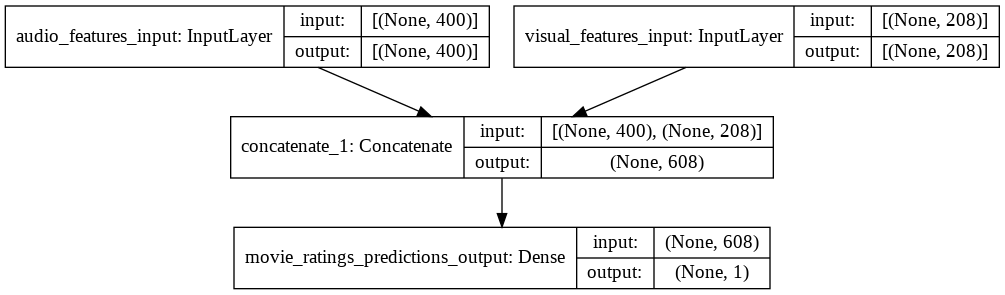

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
mean_value_mean_squared_error = []
mean_value_mean_absolute_error = []

kf = KFold(n_splits=10)
kf.get_n_splits(X1, X2, y)
#print(kf)
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X1, X2, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X1_train, X1_test = X1[train_index], X1[test_index]
  X2_train, X2_test = X2[train_index], X2[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model.fit([X1_train, X2_train], y_train, epochs=100, batch_size=500)
  y_predict = model.predict([X1_test, X2_test])
  
  mean_value_mean_squared_error.append(mean_squared_error(y_test, y_predict, squared=False))
  mean_value_mean_absolute_error.append(mean_absolute_error(y_test, y_predict))

Epoch 1/100
25/25 [==============================] - 13s 5ms/step - loss: 4.8733
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8511
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8646
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8485
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8532
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8445
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8381
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8457
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8418
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8487
Epoch 11/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8632
Epoch 12/100
25/25 [==============================] - 0s 5ms/step - loss: 4.8398
Epoch 13/100
25/25 [================

In [ ]:
reg_model_SOTA_MSE = pd.DataFrame(mean_value_mean_squared_error)
reg_model_SOTA_MAE  = pd.DataFrame(mean_value_mean_absolute_error)
reg_model_SOTA_MSE_mean = reg_model_SOTA_MSE[0].mean()
reg_model_SOTA_MSE_std  = reg_model_SOTA_MSE[0].std()
reg_model_SOTA_mean_MAE = reg_model_SOTA_MAE[0].mean()
reg_model_SOTA_STD_MAE = reg_model_SOTA_MAE[0].std()
print("Mean of mean Squared error for Keras Regression Model: {:.6f} ".format(reg_model_SOTA_MSE_mean))
print("STD of mean Squared error for Keras Regression Model: {:.6f} ".format(reg_model_SOTA_MSE_std))
print("Mean of mean Absolute error for Keras Regression Model: {:.6f} ".format(reg_model_SOTA_mean_MAE ))
print("STD of mean Absolute error for Keras Regression Model: {:.6f} ".format(reg_model_SOTA_STD_MAE))

Mean of mean Squared error for Keras Regression Model: 2.215118 
STD of mean Squared error for Keras Regression Model: 0.046974 
Mean of mean Absolute error for Keras Regression Model: 2.117881 
STD of mean Absolute error for Keras Regression Model: 0.080671 


BAR Charts of Regression Metrices

In [ ]:
regression_metrices = { 'MODELS': ['Linear Regression', 'XGB Regressor', 'Decision Tree Regressor','KNeighbours Regression','SVR Regression','Lasso Regression','Ridge Regression','MLP Regressor','Keras Regression', 'MMN Regression using SOTA'], 
                      'MEAN_MSE':[0.660537, 0.655772, 0.968932, 0.723770, 0.663891, 0.661995, 0.658053,  0.675494, 0.662441, 2.215118], 
                       'STD_MSE':[0.155193, 0.156201, 0.099637, 0.143885, 0.163195, 0.154268, 0.155132, 0.144743, 0.152683, 0.046974], 
                 'MEAN_MAE':[0.509636, 0.507016, 0.740856, 0.559518 , 0.506364, 0.512714, 0.507562, 0.529048, 0.512342, 2.117881],
                   'STD_MAE':[0.109621, 0.107056, 0.080451, 0.098866, 0.112413, 0.105059, 0.109187, 0.096819, 0.104014, 0.080671]
                      }

In [ ]:
Regression_metrices_df = pd.DataFrame(regression_metrices)
Regression_metrices_df.set_index('MODELS', inplace=True)

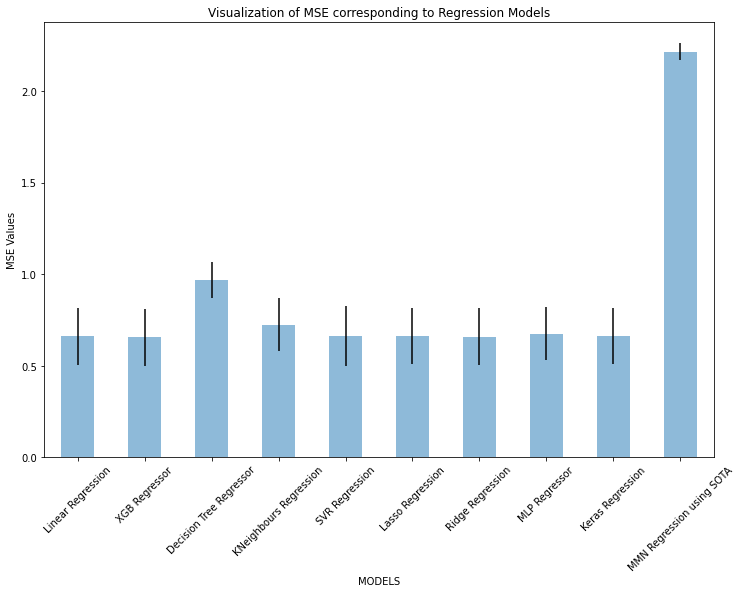

In [ ]:
plt.figure(figsize=(12, 8))
Regression_metrices_df['MEAN_MSE'].plot(kind='bar', yerr=Regression_metrices_df['STD_MSE'].values.T, alpha = 0.5, error_kw=dict(ecolor='k'))
plt.title('Visualization of MSE corresponding to Regression Models')
plt.ylabel('MSE Values')
plt.xticks(rotation=45)
plt.show()

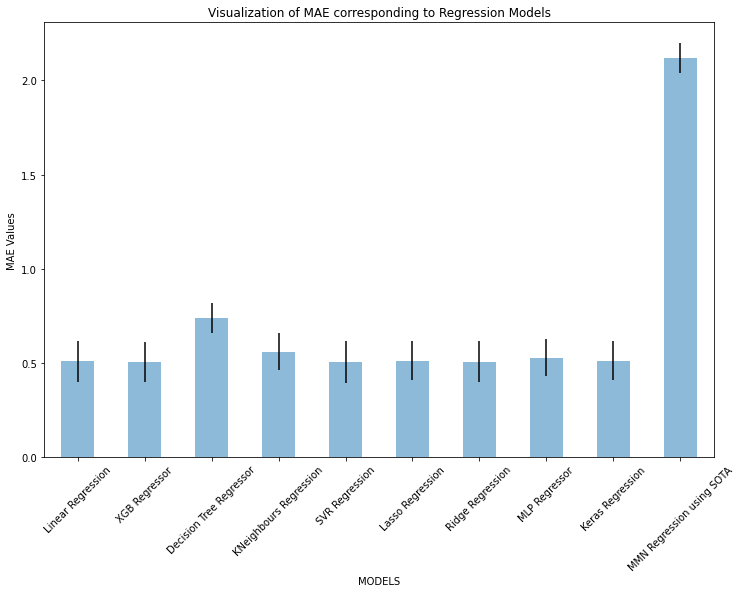

In [ ]:
plt.figure(figsize=(12, 8))
Regression_metrices_df['MEAN_MAE'].plot(kind='bar', yerr=Regression_metrices_df['STD_MAE'].values.T, alpha = 0.5, error_kw=dict(ecolor='k'))
plt.title('Visualization of MAE corresponding to Regression Models')
plt.ylabel('MAE Values')
plt.xticks(rotation=45)
plt.show()


Using Cornell Dialog Dataset

In [ ]:
!unzip -o "/content/drive/MyDrive/cornell_movie_dialogs_corpus_2.zip"

Archive:  /content/drive/MyDrive/cornell_movie_dialogs_corpus_2.zip
   creating: cornell movie-dialogs corpus/
  inflating: cornell movie-dialogs corpus/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cornell movie-dialogs corpus/
  inflating: __MACOSX/cornell movie-dialogs corpus/._.DS_Store  
  inflating: cornell movie-dialogs corpus/chameleons.pdf  
  inflating: __MACOSX/cornell movie-dialogs corpus/._chameleons.pdf  
  inflating: cornell movie-dialogs corpus/movie_characters_metadata.txt  
  inflating: cornell movie-dialogs corpus/movie_conversations.txt  
  inflating: cornell movie-dialogs corpus/movie_lines.txt  
  inflating: cornell movie-dialogs corpus/movie_titles_metadata.txt  
  inflating: cornell movie-dialogs corpus/raw_script_urls.txt  
  inflating: cornell movie-dialogs corpus/README.txt  
  inflating: __MACOSX/cornell movie-dialogs corpus/._README.txt  


In [ ]:
 movies_iD_df = pd.DataFrame(movies_df["movieId"])

In [ ]:
movies_df["title"] = movies_df["title"].str.replace(r"\(.*\)","")
new_movies_df = pd.DataFrame(movies_df["title"].str.upper())
new_movies_df = new_movies_df.astype("str")

In [ ]:
final_movie_df = pd.concat([movies_iD_df, new_movies_df], axis=1)
final_movie_df

,movieId,title
0,89,NICK OF TIME
1,93,VAMPIRE IN BROOKLYN
2,94,BEAUTIFUL GIRLS
3,95,BROKEN ARROW
4,96,IN THE BLEAK MIDWINTER
...,...,...
13618,131237,WHAT MEN TALK ABOUT
13619,131239,THREE QUARTER MOON
13620,131248,BROTHER BEAR 2
13621,131258,THE PIRATES


In [ ]:
movie_titles_df = pd.read_csv("/content/cornell movie-dialogs corpus/movie_titles_metadata.txt", sep = "\+\+\+\$\+\+\+", engine = "python", index_col = False, header=None )

In [ ]:
new_movie_titles_df = pd.DataFrame(movie_titles_df[1].str.upper())
new_movie_titles_df.columns = ["title"]



In [ ]:
final_new_movie_titles_df = pd.concat([new_movie_titles_df, movie_titles_df], ignore_index=True, sort=False, axis=1 )
final_new_movie_titles_df.rename({0 : "title"},inplace=True, axis=1)
final_new_movie_titles_df = final_new_movie_titles_df.astype("str")

In [ ]:
final_new_movie_titles_df.title = final_new_movie_titles_df.title.str.strip()

In [ ]:
final_movie_df.title = final_movie_df.title.str.strip()

In [ ]:
final_merged_df = pd.merge(final_new_movie_titles_df , final_movie_df , on="title", how="inner")
final_merged_df.rename({1 : "Movie"},inplace=True, axis=1)
final_merged_df.Movie = final_merged_df.Movie.str.strip()
final_merged_df

,title,Movie,2,3,4,5,6,movieId
0,10 THINGS I HATE ABOUT YOU,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",2572
1,15 MINUTES,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']",4167
2,2001: A SPACE ODYSSEY,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']",924
3,48 HRS.,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thril...",5049
4,8MM,m6,8mm,1999,6.3,48212,"['crime', 'mystery', 'thriller']",2505
...,...,...,...,...,...,...,...,...
313,WILLOW,m608,willow,1988,7.1,33506,"['action', 'adventure', 'drama', 'fantasy', '...",2193
314,WITNESS,m609,witness,1985,7.6,30705,"['drama', 'romance', 'thriller']",1674
315,XXX,m613,xxx,2002,5.6,53505,"['action', 'adventure', 'crime']",5507
316,X-MEN,m614,x-men,2000,7.4,122149,"['action', 'sci-fi']",3793


In [ ]:
movie_lines_features = ["LineID", "Character", "Movie", "Name", "Line"]
movie_lines_df = pd.read_csv("/content/cornell movie-dialogs corpus/movie_lines.txt", sep = "\+\+\+\$\+\+\+", engine = "python", index_col = False, names = movie_lines_features)
movie_lines_df.Movie = movie_lines_df.Movie.str.strip()

In [ ]:
movie_lines_merged_df = pd.merge( final_merged_df, movie_lines_df, on="Movie", how="inner")
movie_lines_merged_df

,title,Movie,2,3,4,5,6,movieId,LineID,Character,Name,Line
0,10 THINGS I HATE ABOUT YOU,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",2572,L1045,u0,BIANCA,They do not!
1,10 THINGS I HATE ABOUT YOU,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",2572,L1044,u2,CAMERON,They do to!
2,10 THINGS I HATE ABOUT YOU,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",2572,L985,u0,BIANCA,I hope so.
3,10 THINGS I HATE ABOUT YOU,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",2572,L984,u2,CAMERON,She okay?
4,10 THINGS I HATE ABOUT YOU,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",2572,L925,u0,BIANCA,Let's go.
...,...,...,...,...,...,...,...,...,...,...,...,...
158184,YOUNG FRANKENSTEIN,m615,young frankenstein,1974,8.0,57618,"['comedy', 'sci-fi']",1278,L665991,u9021,MAITRE D',"I'm sorry, sir. We only seat by reservation."
158185,YOUNG FRANKENSTEIN,m615,young frankenstein,1974,8.0,57618,"['comedy', 'sci-fi']",1278,L665990,u9023,MONSTER,Food!!
158186,YOUNG FRANKENSTEIN,m615,young frankenstein,1974,8.0,57618,"['comedy', 'sci-fi']",1278,L665989,u9021,MAITRE D',Do you have a reservation?
158187,YOUNG FRANKENSTEIN,m615,young frankenstein,1974,8.0,57618,"['comedy', 'sci-fi']",1278,L665988,u9023,MONSTER,Food!


In [ ]:
movie_lines = movie_lines_merged_df[["Movie", "LineID", "Line"]]
movie_lines.LineID = movie_lines.LineID.str.strip()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Getting the Vectors from the movie -Dialog corpus

In [ ]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = []
for line in movie_lines["Line"].astype("str"):
  data.append(line)

tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

doc2vec model to get the dialog vectors from dialog corpus

In [ ]:
max_epochs = 100
vec_size = 318
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                window_size = 15,
                min_alpha=0.00025,
                negative_size = 5,
                worker_count = 1,
                min_count=1,
                dm =0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
#print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [ ]:
movie_dialogs_vectors_df = pd.DataFrame(model.docvecs['1'])
movie_dialogs_vectors_df.rename({0 : "vectors"},inplace=True, axis=1)

In [ ]:
movie_vectors_df = pd.concat([final_merged_df, movie_dialogs_vectors_df], axis=1)
movie_vectors_df

,title,Movie,2,3,4,5,6,movieId,vectors
0,10 THINGS I HATE ABOUT YOU,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",2572,0.176392
1,15 MINUTES,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']",4167,-0.091126
2,2001: A SPACE ODYSSEY,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']",924,0.264279
3,48 HRS.,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thril...",5049,-0.243113
4,8MM,m6,8mm,1999,6.3,48212,"['crime', 'mystery', 'thriller']",2505,0.114266
...,...,...,...,...,...,...,...,...,...
313,WILLOW,m608,willow,1988,7.1,33506,"['action', 'adventure', 'drama', 'fantasy', '...",2193,0.143776
314,WITNESS,m609,witness,1985,7.6,30705,"['drama', 'romance', 'thriller']",1674,0.066644
315,XXX,m613,xxx,2002,5.6,53505,"['action', 'adventure', 'crime']",5507,0.047602
316,X-MEN,m614,x-men,2000,7.4,122149,"['action', 'sci-fi']",3793,0.060411


In [ ]:
final_movie_features_df = pd.merge(final_merge_frame_rating_audio_visual, movie_vectors_df, on="movieId", how="inner")


In [ ]:
y = np.array(final_movie_features_df["rating"])
X = np.array(final_movie_features_df.drop(["movieId", "rating", "title",	"Movie"	, 2,	3,	4,	5,	6 ], axis=1))


Regression models with 3 multimodal features audio, visual, and dialogs of the movies to predict the movie ratings

Model 1 : Linear Regression

In [ ]:
linear_reg_model = regression_model(LinearRegression(), X, y)

Baseline: Mean for the model: -1.058702, STD for the Model: 0.490119 


In [ ]:
linear_reg_model = pd.DataFrame(linear_reg_model)
linear_reg_model_mean_std = linear_reg_model.transpose()
linear_reg_model_mean_MSE = linear_reg_model_mean_std[0].mean()
linear_reg_model_STD_MSE = linear_reg_model_mean_std[0].std()
linear_reg_model_mean_MAE = linear_reg_model_mean_std[1].mean()
linear_reg_model_STD_MAE = linear_reg_model_mean_std[1].std()
print("Mean of mean Squared error for Linear Regression Model: {:.6f} ".format(linear_reg_model_mean_MSE))
print("STD of mean Squared error for Linear Regression Model:  {:.6f}  ".format(linear_reg_model_STD_MSE))
print("Mean of mean Absolute error  for Linear Regression Model: {:.6f}  ".format(linear_reg_model_mean_MAE))
print("STD of mean Absolute error  for Linear Regression Model: {:.6f} ".format(linear_reg_model_STD_MAE))

Mean of mean Squared error for Linear Regression Model: 1.006563 
STD of mean Squared error for Linear Regression Model:  0.224927  
Mean of mean Absolute error  for Linear Regression Model: 0.790009  
STD of mean Absolute error  for Linear Regression Model: 0.160751 


Model 2 :  XGB Regressor

In [ ]:
XGB_reg_Model = regression_model(XGBRegressor(), X, y)

[22:03:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:04:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
XGB_reg_Model = pd.DataFrame(XGB_reg_Model)
XGB_reg_Model_mean_std = XGB_reg_Model.transpose()
XGB_reg_Model_mean_MSE = XGB_reg_Model_mean_std[0].mean()
XGB_reg_Model_STD_MSE = XGB_reg_Model_mean_std[0].std()
XGB_reg_Model_mean_MAE = XGB_reg_Model_mean_std[1].mean()
XGB_reg_Model_STD_MAE = XGB_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for xgboost Regression Model: {:.6f} ".format(XGB_reg_Model_mean_MSE))
print("STD of mean Squared error for xgboost Regression Model: {:.6f} ".format(XGB_reg_Model_STD_MSE))
print("Mean of mean Absolute error for xgboost Regression Model: {:.6f} ".format(XGB_reg_Model_mean_MAE ))
print("STD of mean Absolute error for xgboost Regression Model: {:.6f} ".format(XGB_reg_Model_STD_MAE))

Mean of mean Squared error for xgboost Regression Model: 0.594585 
STD of mean Squared error for xgboost Regression Model: 0.166192 
Mean of mean Absolute error for xgboost Regression Model: 0.476392 
STD of mean Absolute error for xgboost Regression Model: 0.122361 


Model 3 : Decision Tree Regressor

In [ ]:
DTR_reg_Model = regression_model(DecisionTreeRegressor(), X, y)

Baseline: Mean for the model: -0.666569, STD for the Model: 0.326573 


In [ ]:
DTR_reg_Model = pd.DataFrame(DTR_reg_Model)
DTR_reg_Model_mean_std = DTR_reg_Model.transpose()
DTR_reg_Model_mean_MSE = DTR_reg_Model_mean_std[0].mean()
DTR_reg_Model_STD_MSE = DTR_reg_Model_mean_std[0].std()
DTR_reg_Model_mean_MAE = DTR_reg_Model_mean_std[1].mean()
DTR_reg_Model_STD_MAE = DTR_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for Decision Tree Regression Model: {:.6f} ".format(DTR_reg_Model_mean_MSE))
print("STD of mean Squared error for Decision Tree Regression Model: {:.6f} ".format(DTR_reg_Model_STD_MSE))
print("Mean of mean Absolute error for Decision Tree Regression Model: {:.6f} ".format(DTR_reg_Model_mean_MAE ))
print("STD of mean Absolute error for Decision Tree Regression Model: {:.6f} ".format(DTR_reg_Model_STD_MAE))

Mean of mean Squared error for Decision Tree Regression Model: 0.807185 
STD of mean Squared error for Decision Tree Regression Model: 0.190159 
Mean of mean Absolute error for Decision Tree Regression Model: 0.626131 
STD of mean Absolute error for Decision Tree Regression Model: 0.168373 


Model 4 : KNeighbors Regressor

In [ ]:
KNN_reg_Model = regression_model(KNeighborsRegressor(), X, y)

Baseline: Mean for the model: -0.424084, STD for the Model: 0.196457 


In [ ]:
KNN_reg_Model = pd.DataFrame(KNN_reg_Model)
KNN_reg_Model_mean_std = KNN_reg_Model.transpose()
KNN_reg_Model_mean_MSE = KNN_reg_Model_mean_std[0].mean()
KNN_reg_Model_STD_MSE = KNN_reg_Model_mean_std[0].std()
KNN_reg_Model_mean_MAE = KNN_reg_Model_mean_std[1].mean()
KNN_reg_Model_STD_MAE = KNN_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for KNeighbors Regression Model: {:.6f} ".format(KNN_reg_Model_mean_MSE))
print("STD of mean Squared error for KNeighbors Regression Model: {:.6f} ".format(KNN_reg_Model_STD_MSE))
print("Mean of mean Absolute error for KNeighbors Regression Model: {:.6f} ".format(KNN_reg_Model_mean_MAE ))
print("STD of mean Absolute error for KNeighbors Regression Model: {:.6f} ".format(KNN_reg_Model_STD_MAE))

Mean of mean Squared error for KNeighbors Regression Model: 0.634856 
STD of mean Squared error for KNeighbors Regression Model: 0.152905 
Mean of mean Absolute error for KNeighbors Regression Model: 0.511470 
STD of mean Absolute error for KNeighbors Regression Model: 0.126964 


Model 5 : SVR Regression

In [ ]:
SVM_reg_Model = regression_model(SVR(), X, y)

Baseline: Mean for the model: -0.386016, STD for the Model: 0.225625 


In [ ]:
SVM_reg_Model = pd.DataFrame(SVM_reg_Model)
SVM_reg_Model_mean_std = SVM_reg_Model.transpose()
SVM_reg_Model_mean_MSE = SVM_reg_Model_mean_std[0].mean()
SVM_reg_Model_STD_MSE = SVM_reg_Model_mean_std[0].std()
SVM_reg_Model_mean_MAE = SVM_reg_Model_mean_std[1].mean()
SVM_reg_Model_STD_MAE = SVM_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for SVM Regression Model: {:.6f} ".format( SVM_reg_Model_mean_MSE))
print("STD of mean Squared error for SVM Regression Model: {:.6f} ".format(SVM_reg_Model_STD_MSE))
print("Mean of mean Absolute error for SVM Regression Model: {:.6f} ".format(SVM_reg_Model_mean_MAE))
print("STD of mean Absolute error for SVM Regression Model: {:.6f} ".format(SVM_reg_Model_STD_MAE))

Mean of mean Squared error for SVM Regression Model: 0.599327 
STD of mean Squared error for SVM Regression Model: 0.172639 
Mean of mean Absolute error for SVM Regression Model: 0.483864 
STD of mean Absolute error for SVM Regression Model: 0.131537 


Model 6 : Lasso Regression

In [ ]:
lasso_reg = Lasso(normalize=True)
lasso_reg_model = regression_model(lasso_reg, X, y)

Baseline: Mean for the model: -0.381650, STD for the Model: 0.218266 


In [ ]:
lasso_reg_model = pd.DataFrame(lasso_reg_model)
lasso_reg_Model_mean_std = lasso_reg_model.transpose()
lasso_reg_Model_mean_MSE = lasso_reg_Model_mean_std[0].mean()
lasso_reg_Model_STD_MSE = lasso_reg_Model_mean_std[0].std()
lasso_reg_Model_mean_MAE = lasso_reg_Model_mean_std[1].mean()
lasso_reg_Model_STD_MAE = lasso_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for lasso Regression Model: {:.6f} ".format(lasso_reg_Model_mean_MSE))
print("STD of mean Squared error for lasso Regression Model: {:.6f} ".format( lasso_reg_Model_STD_MSE))
print("Mean of mean Absolute error for lasso Regression Model: {:.6f} ".format(lasso_reg_Model_mean_MAE))
print("STD of mean Absolute error for lasso Regression Model: {:.6f} ".format(lasso_reg_Model_STD_MAE))

Mean of mean Squared error for lasso Regression Model: 0.596414 
STD of mean Squared error for lasso Regression Model: 0.169773 
Mean of mean Absolute error for lasso Regression Model: 0.485506 
STD of mean Absolute error for lasso Regression Model: 0.141180 


Model 7 : Ridge Regression

In [ ]:
Ridge_reg_Model = regression_model(Ridge(), X, y)

Baseline: Mean for the model: -0.756912, STD for the Model: 0.435469 


In [ ]:
Ridge_reg_Model = pd.DataFrame(Ridge_reg_Model)
Ridge_reg_Model_mean_std = Ridge_reg_Model.transpose()
Ridge_reg_Model_mean_MSE = Ridge_reg_Model_mean_std[0].mean()
Ridge_reg_Model_STD_MSE = Ridge_reg_Model_mean_std[0].std()
Ridge_reg_Model_mean_MAE = Ridge_reg_Model_mean_std[1].mean()
Ridge_reg_Model_STD_MAE = Ridge_reg_Model_mean_std[1].std()
print("Mean of mean Squared error for Ridge Regression Model: {:.6f} ".format(Ridge_reg_Model_mean_MSE))
print("STD of mean Squared error for Ridge Regression Model: {:.6f} ".format(Ridge_reg_Model_STD_MSE))
print("Mean of mean Absolute error for Ridge Regression Model: {:.6f} ".format(Ridge_reg_Model_mean_MAE ))
print("STD of mean Absolute error for Ridge Regression Model: {:.6f} ".format(Ridge_reg_Model_STD_MAE))

Mean of mean Squared error for Ridge Regression Model: 0.842937 
STD of mean Squared error for Ridge Regression Model: 0.226983 
Mean of mean Absolute error for Ridge Regression Model: 0.658263 
STD of mean Absolute error for Ridge Regression Model: 0.167539 


Model 8 : MLPRegressor

In [ ]:
regr = MLPRegressor(hidden_layer_sizes=(304, 152), learning_rate_init=0.5, max_iter=200, activation="relu")
regr

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(304, 152), learning_rate='constant',
             learning_rate_init=0.5, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
MLP_regressor_model = regression_model(regr, X, y)

Baseline: Mean for the model: -893.620579, STD for the Model: 1905.871427 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
MLP_regressor_model = pd.DataFrame(MLP_regressor_model)
MLP_regressor_Model_mean_std = MLP_regressor_model.transpose()
MLP_regressor_model_mean_MSE = MLP_regressor_Model_mean_std[0].mean()
MLP_regressor_model_STD_MSE = MLP_regressor_Model_mean_std[0].std()
MLP_regressor_model_mean_MAE = MLP_regressor_Model_mean_std[1].mean()
MLP_regressor_model_STD_MAE = MLP_regressor_Model_mean_std[1].std()
print("Mean of mean Squared error for MLP Regression Model: {:.6f} ".format(MLP_regressor_model_mean_MSE))
print("STD of mean Squared error for MLP Regression Model: {:.6f} ".format(MLP_regressor_model_STD_MSE))
print("Mean of mean Absolute error for MLP Regression Model: {:.6f} ".format( MLP_regressor_model_mean_MAE ))
print("STD of mean Absolute error for MLP Regression Model: {:.6f} ".format(MLP_regressor_model_STD_MAE))

Mean of mean Squared error for MLP Regression Model: 6.860232 
STD of mean Squared error for MLP Regression Model: 7.105126 
Mean of mean Absolute error for MLP Regression Model: 6.823534 
STD of mean Absolute error for MLP Regression Model: 7.125080 


Model 9 : Keras Regression

In [ ]:
def baseline_model():
  model = Sequential()
  model.add(Dense(609, input_dim=609, activation='relu'))
  model.add(Dense(304, activation= "relu"))
  model.add(Dense(152, activation= "relu"))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer="rmsprop")

  
  return model


In [ ]:
baseline_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 609)               371490    
_________________________________________________________________
dense_1 (Dense)              (None, 304)               185440    
_________________________________________________________________
dense_2 (Dense)              (None, 152)               46360     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 153       
Total params: 603,443
Trainable params: 603,443
Non-trainable params: 0
_________________________________________________________________


In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=500, verbose=0)

In [ ]:
keras_regression_model = regression_model(estimator, X, y)

Baseline: Mean for the model: -319.155684, STD for the Model: 616.291793 


In [ ]:
keras_regression_model = pd.DataFrame(keras_regression_model)
keras_regression_model_mean_std = keras_regression_model.transpose()
keras_regression_model_mean_MSE = keras_regression_model_mean_std[0].mean()
keras_regression_model_STD_MSE = keras_regression_model_mean_std[0].std()
keras_regression_model_mean_MAE = keras_regression_model_mean_std[1].mean()
keras_regression_model_STD_MAE = keras_regression_model_mean_std[1].std()
print("Mean of mean Squared error for Keras Regression Model: {:.6f} ".format(keras_regression_model_mean_MSE))
print("STD of mean Squared error for Keras Regression Model: {:.6f} ".format(keras_regression_model_STD_MSE))
print("Mean of mean Absolute error for Keras Regression Model: {:.6f} ".format(keras_regression_model_mean_MAE))
print("STD of mean Absolute error for Keras Regression Model: {:.6f} ".format(keras_regression_model_STD_MAE))

Mean of mean Squared error for Keras Regression Model: 9.888266 
STD of mean Squared error for Keras Regression Model: 11.573382 
Mean of mean Absolute error for Keras Regression Model: 8.619970 
STD of mean Absolute error for Keras Regression Model: 10.573196 


Model 10 : Multimodal Network Regression using ***the State of the
Art***


In [ ]:
final_audio_features_df = pd.merge(Audio_ivector_df, movie_vectors_df, on="movieId", how="inner")
x1 = np.array(final_audio_features_df.drop(["movieId", "title",	"Movie", "vectors"	, 2,	3,	4,	5,	6 ], axis=1))

In [ ]:
x1.shape

(318, 400)

In [ ]:
final_visual_features_df = pd.merge(Visual_Aesthetic_features_AvgVar_df, movie_vectors_df, on="movieId", how="inner")
x2 = np.array(final_visual_features_df.drop(["movieId", "title",	"Movie", "vectors"	, 2,	3,	4,	5,	6 ], axis=1))

In [ ]:
x2.shape

(318, 208)

In [ ]:
x3 = np.array(movie_vectors_df["vectors"])

In [ ]:
x3.shape

(318,)

In [ ]:
audio_features_input = Input(shape=(400, ), name='audio_features_input')
audio_features_branch = Dense(400, input_dim=400, activation='relu',name='audio_features_branch')(audio_features_input)
visual_features_input = Input(shape=(208,), name='visual_features_input')
visual_features_branch = Dense(208, input_dim=208, activation='relu', name='visual_features_branch')(visual_features_input)
dialogs_features_input = Input(shape=(1,), name='dialogs_features_input')
dialogs_features_branch = Dense(1, input_dim=1, activation='relu', name='dialogs_features_branch')(dialogs_features_input)
merged_features = concatenate([audio_features_input, visual_features_input, dialogs_features_input], axis=1)
movie_ratings_predictions = Dense(1, name='movie_ratings_predictions_output', activation='softmax')(merged_features)
model = Model(inputs=[audio_features_input, visual_features_input, dialogs_features_input], outputs=movie_ratings_predictions)
model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
audio_features_input (InputLaye [(None, 400)]        0                                            
__________________________________________________________________________________________________
visual_features_input (InputLay [(None, 208)]        0                                            
__________________________________________________________________________________________________
dialogs_features_input (InputLa [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 609)          0           audio_features_input[0][0]       
                                                                 visual_features_input[0][0]

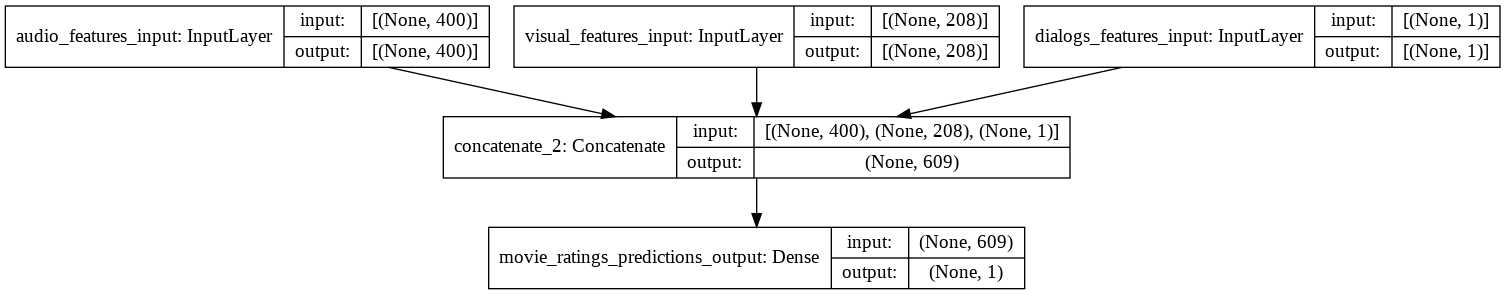

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
mean_value_mean_squared_error = []
mean_value_mean_absolute_error = []

kf = KFold(n_splits=10)
kf.get_n_splits(x1)
#print(kf)
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x1):
  #print("TRAIN:", train_index, "TEST:", test_index)
  x1_train, x1_test = x1[train_index], x1[test_index]
  x2_train, x2_test = x2[train_index], x2[test_index]
  x3_train, x3_test = x3[train_index], x3[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model.fit([x1_train, x2_train, x3_train], y_train, epochs=100, batch_size=500)
  y_predict = model.predict([x1_test, x2_test, x3_test])
  
  mean_value_mean_squared_error.append(mean_squared_error(y_test, y_predict, squared=False))
  mean_value_mean_absolute_error.append(mean_absolute_error(y_test, y_predict))

Epoch 1/100
1/1 [==============================] - 1s 880ms/step - loss: 5.0571
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 5.0571
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 5.0571
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 5.0571
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 5.0571
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 5.0571
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 5.0571
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 5.0571
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 5.0571
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 5.0571
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 5.0571
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 5.0571
Epoch 13/100
1/1 [==============================] - 0s 7ms

In [ ]:
reg_model_SOTA_MSE = pd.DataFrame(mean_value_mean_squared_error)
reg_model_SOTA_MAE  = pd.DataFrame(mean_value_mean_absolute_error)
reg_model_SOTA_MSE_mean = reg_model_SOTA_MSE[0].mean()
reg_model_SOTA_MSE_std  = reg_model_SOTA_MSE[0].std()
reg_model_SOTA_mean_MAE = reg_model_SOTA_MAE[0].mean()
reg_model_SOTA_STD_MAE = reg_model_SOTA_MAE[0].std()
print("Mean of mean Squared error for Keras Regression Model: {:.6f} ".format(reg_model_SOTA_MSE_mean))
print("STD of mean Squared error for Keras Regression Model: {:.6f} ".format(reg_model_SOTA_MSE_std))
print("Mean of mean Absolute error for Keras Regression Model: {:.6f} ".format(reg_model_SOTA_mean_MAE ))
print("STD of mean Absolute error for Keras Regression Model: {:.6f} ".format(reg_model_SOTA_STD_MAE))

Mean of mean Squared error for Keras Regression Model: 2.253213 
STD of mean Squared error for Keras Regression Model: 0.135576 
Mean of mean Absolute error for Keras Regression Model: 2.210381 
STD of mean Absolute error for Keras Regression Model: 0.138703 


BAR graphs for Regression Metrices

In [ ]:
regression_metrices_1 = { 'MODELS': ['Linear Regression', 'XGB Regressor', 'Decision Tree Regressor','KNeighbours Regression','SVR Regression','Lasso Regression','Ridge Regression','MLP Regressor','Keras Regression','SOTA Regression'], 
                      'MEAN_MSE':[1.006563, 0.594585, 0.807185, 0.634856, 0.599327, 0.596414, 0.842937,  6.860232, 9.888266 , 2.253213], 
                       'STD_MSE':[0.224927, 0.166192, 0.190159, 0.152905, 0.172639, 0.169773, 0.226983, 7.105126, 11.573382, 0.135576], 
                 'MEAN_MAE':[0.790009, 0.476392, 0.626131, 0.511470 , 0.483864, 0.485506, 0.658263, 6.823534, 8.619970 , 2.210381],
                   'STD_MAE':[0.160751, 0.122361, 0.168373, 0.126964, 0.131537, 0.141180, 0.167539, 7.125080, 10.573196 , 0.138703]
                      }

In [ ]:
Regression_metrices_df_1 = pd.DataFrame(regression_metrices_1)
Regression_metrices_df_1.set_index('MODELS', inplace=True)

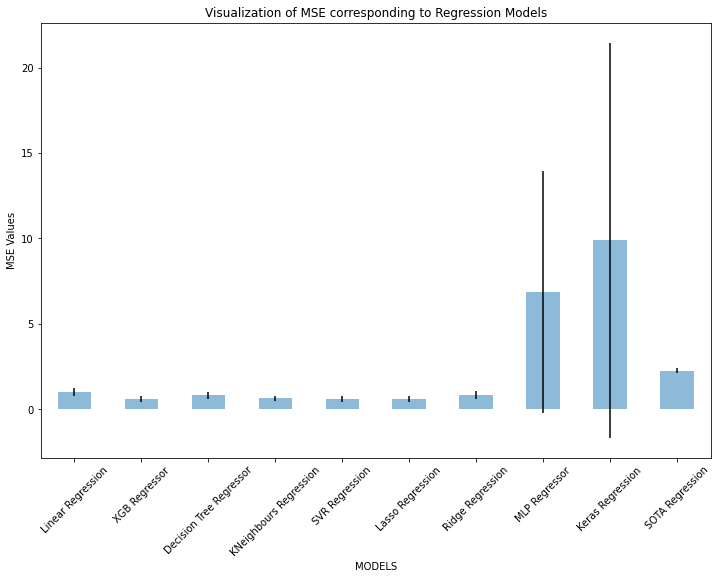

In [ ]:
plt.figure(figsize=(12, 8))
Regression_metrices_df_1['MEAN_MSE'].plot(kind='bar', yerr=Regression_metrices_df_1['STD_MSE'].values.T, alpha = 0.5, error_kw=dict(ecolor='k'))
plt.title('Visualization of MSE corresponding to Regression Models')
plt.ylabel('MSE Values')
plt.xticks(rotation=45)
plt.show()

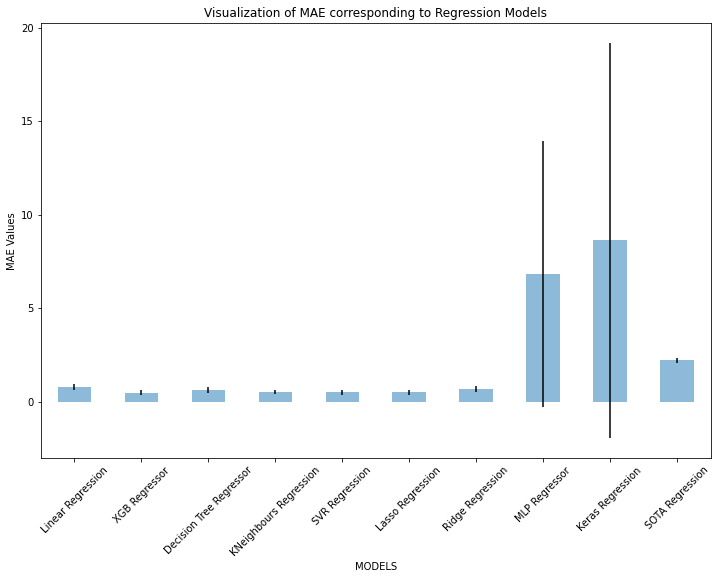

In [ ]:
plt.figure(figsize=(12, 8))
Regression_metrices_df_1['MEAN_MAE'].plot(kind='bar', yerr=Regression_metrices_df_1['STD_MAE'].values.T, alpha = 0.5, error_kw=dict(ecolor='k'))
plt.title('Visualization of MAE corresponding to Regression Models')
plt.ylabel('MAE Values')
plt.xticks(rotation=45)
plt.show()

Gantt diagram

In [26]:
import plotly.figure_factory as ff

df = [dict(Task="To Read some part of the book from https://www.deeplearningbook.org and first reference paper", Start='2021-02-01', Finish='2021-02-08', Resource='Incomplete'),
      dict(Task=" To Read some part of the book from https://www.deeplearningbook.org and first reference paper", Start='2021-02-09', Finish='2021-02-15', Resource='Complete'),
      dict(Task="To read the other Refrence Papers", Start='2021-02-16', Finish='2021-02-22', Resource='Complete'),
      dict(Task="To summarize all the references", Start='2021-02-23', Finish='2021-02-28', Resource='Complete'),
      dict(Task="Merging of the MMTF-14k and MovieLens datset to obtain the aaverage ratings", Start='2021-03-01', Finish='2021-03-15', Resource='Incomplete'),
      dict(Task="To make the state of the art of multimodel deep learning", Start='2021-03-01', Finish='2021-03-31', Resource='Incomplete'),
      dict(Task="Merging of the MMTF-14k and MovieLens datset to obtain the average ratings", Start='2021-03-01', Finish='2021-03-22', Resource='Complete'),
      dict(Task="To create different Regression models using the Audio, Visuals Features and average ratings", Start='2021-03-23', Finish='2021-04-30', Resource='Incomplete'),
      dict(Task="Exploratory Data Analysis", Start='2021-04-13', Finish='2021-04-30', Resource='Complete'),
      dict(Task="Work upon mid-term Report -", Start='2021-04-13', Finish='2021-04-30', Resource='Complete'),
       dict(Task="Work upon doc2vec to get movie dialog feature vectors -", Start='2021-04-30', Finish='2021-05-30', Resource='Complete'),
       dict(Task="Work upon enhancing the results and completing the report-", Start='2021-05-30', Finish='2021-07-02', Resource='Complete'),
      ]

colors = {'Not Started': 'rgb(220, 0, 0)',
          'Incomplete': (1, 0.9, 0.16),
          'Complete': 'rgb(0, 255, 100)'}

fig = ff.create_gantt(df, colors=colors, index_col='Resource', show_colorbar=True,
                      group_tasks=True)
fig.show()